# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [21]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned ON


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

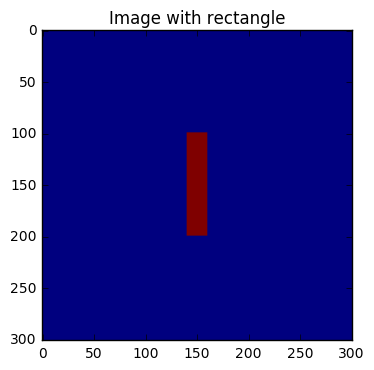

In [22]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside

img[100:200, 140:160] = 255

plt.figure()
plt.title('Image with rectangle')
plt.imshow(img)



**1.2** We can compute the FFT as follows:

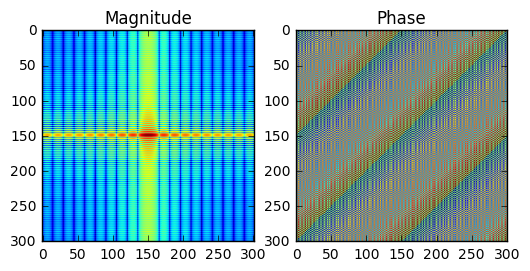

In [23]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

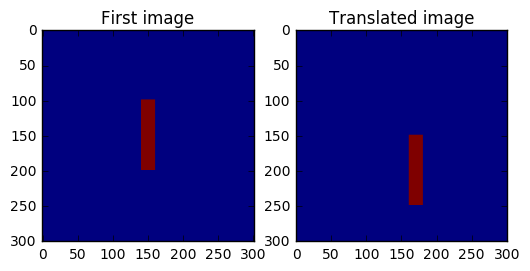

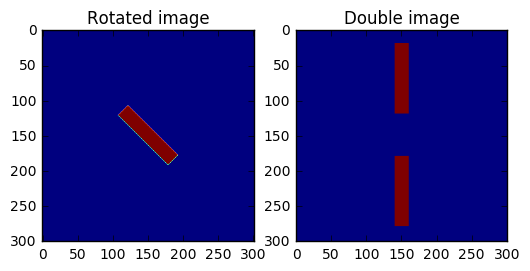

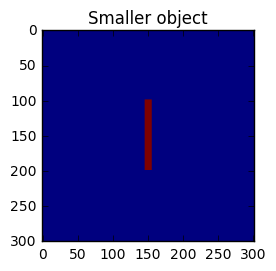

In [24]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255


# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside
img_trans[150:250, 160:180] = 255

img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))
# Draw a rectangle inside
img3[100:200, 145:155] = 255

plt.figure
plt.subplot(121)
plt.imshow(img)
plt.title('First image')

plt.subplot(122)
plt.imshow(img_trans)
plt.title('Translated image')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img_rot)
plt.title('Rotated image')

plt.subplot(122)
plt.imshow(img2)
plt.title('Double image')
plt.show()

plt.figure
plt.subplot(121)
plt.imshow(img3)
plt.title('Smaller object')
plt.show()


The original image: the zero-crossings of the spectrum are closer in the vertical direction because of the shape of the rectangel itself. It is longer in that direction
 
1-translated
 When we translate the phase shift, as the frequencies are not in the same place as in the original, although the overall magnitude is the same 
 Because of the equation of the 2D DFT being F(u,v)=|F(u,v)|e^(j*phi(u,v)  if the magnitud doesnt change for a different image, the phase has to. And so it does.
 
2-rotated
so the angle of rotation of our image is in fact the same angle in rotation in the FFT, both in magnitud and phase

 
3 - double image
What happens here is that, as the length of both rectangles are twice the length of one, the zero-crossings in that direction are even closer than in the original image
 
4 - smaller image
Similar to the double image, as the length of the rectangle in the x direction is reduced, it is also reduced the closeness between the vertical lines, thats why they are mo

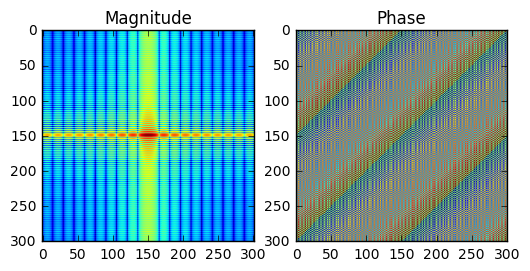

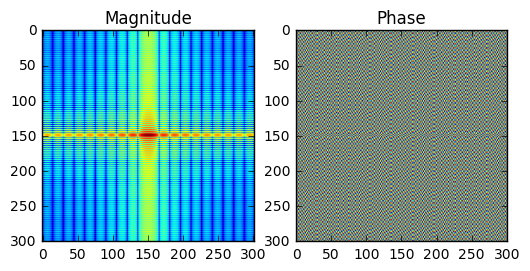

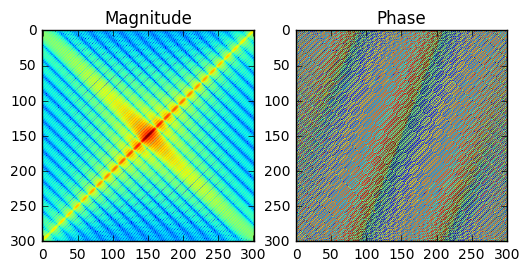

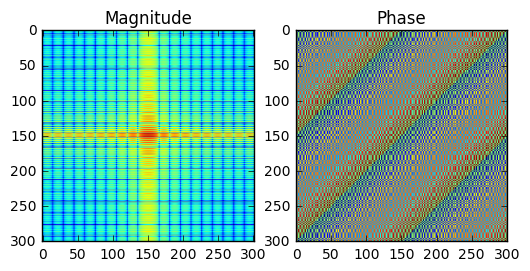

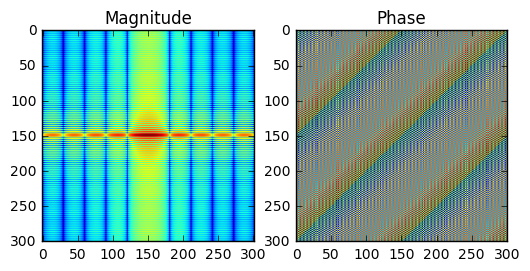

In [25]:
img_freq = np.fft.fftshift(np.fft.fft2(img))
print ('The original image: the zero-crossings of the spectrum are closer in the vertical direction because of the shape of the rectangel itself. It is longer in that direction')
print (' ')
# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


img_freq = np.fft.fftshift(np.fft.fft2(img_trans))
print ('1-translated')
print (' When we translate the phase shift, as the frequencies are not in the same place as in the original, although the overall magnitude is the same ')
print (' Because of the equation of the 2D DFT being F(u,v)=|F(u,v)|e^(j*phi(u,v)  if the magnitud doesnt change for a different image, the phase has to. And so it does.')

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')
print (' ')

img_freq = np.fft.fftshift(np.fft.fft2(img_rot))
print ('2-rotated')  #
print ('so the angle of rotation of our image is in fact the same angle in rotation in the FFT, both in magnitud and phase')
print ('')
print (' ')

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')

img_freq = np.fft.fftshift(np.fft.fft2(img2))
print ('3 - double image')  #
print ('What happens here is that, as the length of both rectangles are twice the length of one, the zero-crossings in that direction are even closer than in the original image')
print (' ')
# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')

img_freq = np.fft.fftshift(np.fft.fft2(img3))
print ('4 - smaller image')  #
print ('Similar to the double image, as the length of the rectangle in the x direction is reduced, it is also reduced the closeness between the vertical lines, thats why they are more separated')
# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')

**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


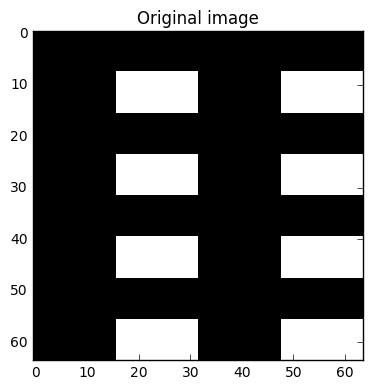

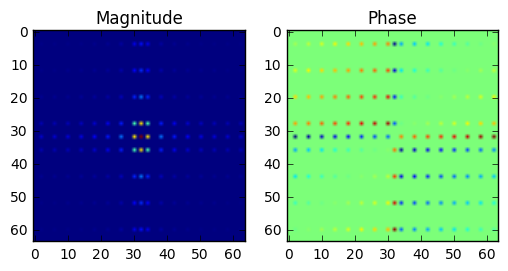

In [26]:
N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]

plt.figure()
plt.title('Original image')
io.imshow(Img)
plt.show()

img_freq = np.fft.fftshift(np.fft.fft2(Img)) #if we don't shift it, the appear at the corners (    img_freq =(np.fft.fft2(Img))   )
img_freq = img_freq / (N*N)

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')



**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Dani\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The number of sinus at different phases needed for reconstructing vertically the image is greater than for doing it horizontally. We can see that in the original image, there are more changes vertically than horizontally, that means higher frequency


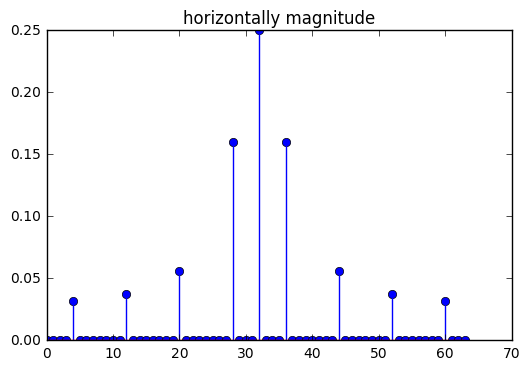

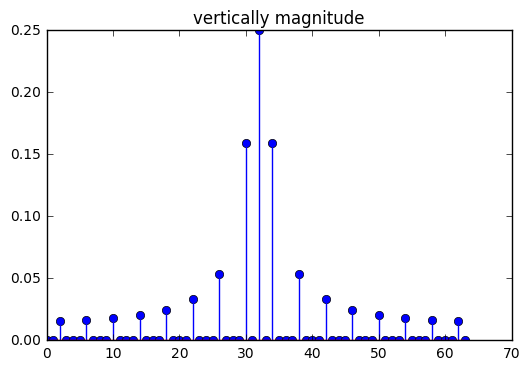

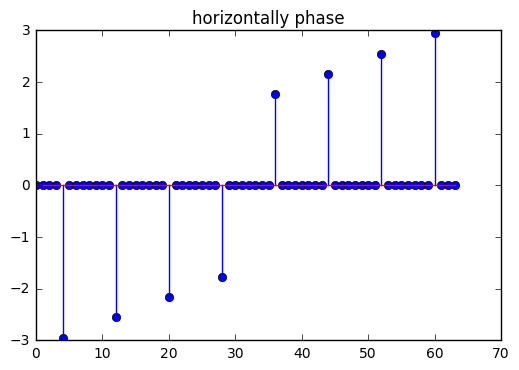

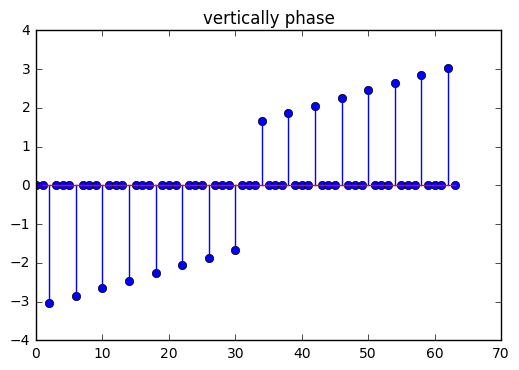

In [27]:

plt.figure()
plt.title('horizontally magnitude')
plt.stem(np.abs(img_freq)[:,N/2])
plt.figure()
plt.title('vertically magnitude')
plt.stem(np.abs(img_freq)[N/2,:])


plt.figure()
plt.title('horizontally phase')
plt.stem(np.angle(img_freq)[:,N/2])
plt.figure()
plt.title('vertically phase')
plt.stem(np.angle(img_freq)[N/2,:])
print ('The number of sinus at different phases needed for reconstructing vertically the image is greater than for doing it horizontally. We can see that in the original image, there are more changes vertically than horizontally, that means higher frequency')


**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

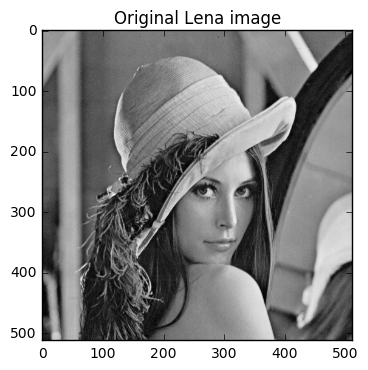

(512, 512)


C:\Users\Dani\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


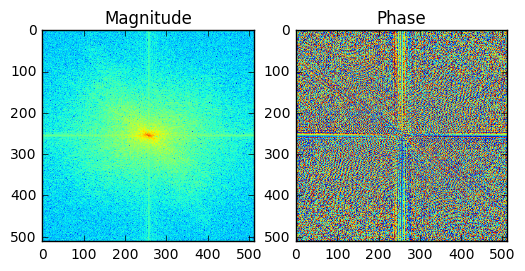

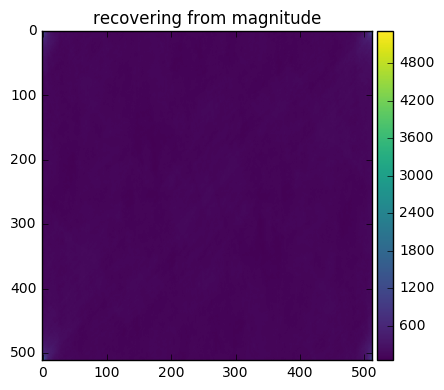

C:\Users\Dani\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


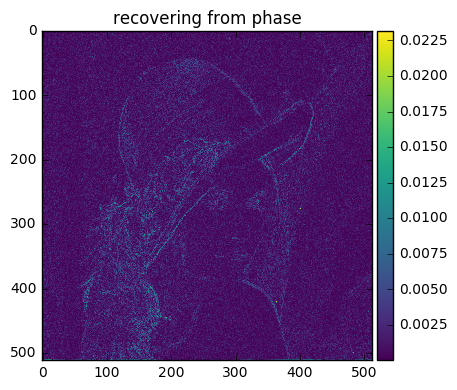

In [28]:
Path = '../images/'
image_name = 'lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
plt.figure
plt.title('Original Lena image')
plt.imshow(lena_im, cmap=plt.cm.gray)
plt.show()
print (lena_im.shape)


# Compute the DFT
img_freq_lena = np.fft.fftshift(np.fft.fft2(lena_im))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_lena)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq_lena))
ax2.set_title('Phase')

mag =np.abs(img_freq_lena)
pha =np.angle(img_freq_lena)
            
#trying to reconstruct fom magnitude and phase
img_rec_mag = np.fft.ifft2(mag)
plt.figure()
plt.title('recovering from magnitude')
io.imshow(np.abs(img_rec_mag.real))
plt.show()

img_rec_phase = np.fft.ifft2(np.exp(1j*pha))
plt.figure()
plt.title('recovering from phase')
io.imshow(np.abs(img_rec_phase.real))
plt.show()




**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$     #this means shifting to the center (the -1) (read page 237-255 (periodicity of the signal)? of the book)
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
1024.0
[[ 162.  162.  162. ...,    0.    0.    0.]
 [ 162.  162.  162. ...,    0.    0.    0.]
 [ 162.  162.  162. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]


C:\Users\Dani\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


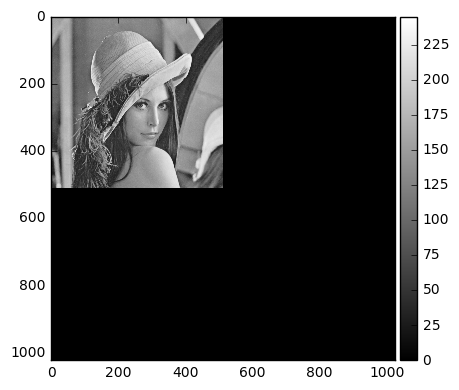

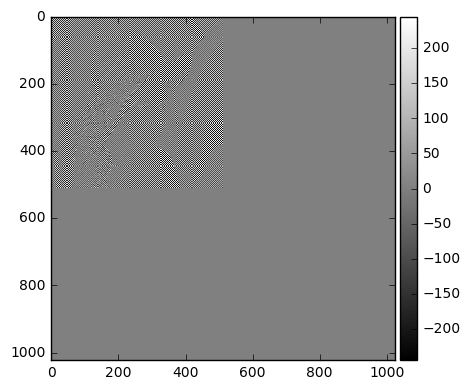

In [29]:
#fftimage * fftfilter (both padded to not have errors)
#one row mustn be added because of the sobel being an odd function

pad_frame = (512*2,512*2)
hp = np.zeros(pad_frame)
print (hp)
print (np.sqrt(hp.size))

hp[:lena_im.shape[0],:lena_im.shape[1]] = lena_im #inserting lena in the padding

print (hp)#checking results
io.imshow(hp,  cmap=plt.cm.gray)


#lena_shifted2center = np.fft.fftshift(np.fft.fft2(hp)) #if we don't shift it, the appear at the corners (    img_freq =(np.fft.fft2(Img))   )
#lena_shifted2center = lena_shifted2center / (hp.shape[0]*hp.shape[1])


def center (f):
    f_centered = np.zeros((f.shape[0],f.shape[1]))
    for i in range (0, f.shape[0]):
        for j in range (0, f.shape[1]):
            f_centered[i,j] = f[i,j] * ((-1)**(i+j))
    
    return f_centered


lena_centered = center (hp)
plt.figure()
io.imshow(lena_centered,  cmap=plt.cm.gray)


#f, (ax1, ax2) = plt.subplots(1, 2)
#ax1.imshow(exposure.adjust_log(np.abs(lena_shifted2center)))
#ax1.set_title('Magnitude')
#ax2.imshow(np.angle(lena_shifted2center))
#ax2.set_title('Phase')






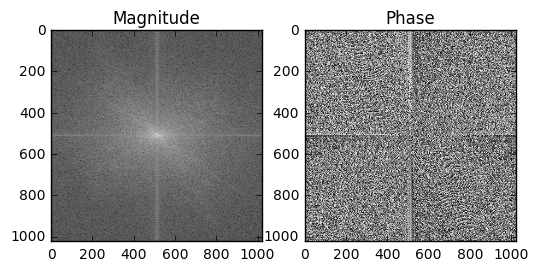

In [30]:
#displayin magnitude and phase of lena
img_freq_center_lena = np.fft.fft2(lena_centered)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow((exposure.adjust_log(np.abs(img_freq_center_lena))), cmap=plt.cm.gray)
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq_center_lena),cmap=plt.cm.gray)
ax2.set_title('Phase')

In [31]:
#creating sobel filter and fitting it into the padding
S2 = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
pad_frame = (512*2,512*2)
hp_f = np.zeros(pad_frame)
hp_f[:S2.shape[0],:S2.shape[1]] = S2 #inserting lena in the padding

#checking results
print (hp_f)

#centering filter
filter_centered = center (hp_f)




[[-1. -2. -1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  2.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


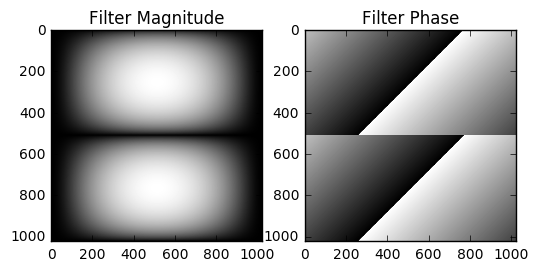

In [32]:
#plotting magnitude and phase of the filter
img_freq_center_filter = np.fft.fft2(filter_centered)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow((exposure.adjust_log(np.abs(img_freq_center_filter))), cmap=plt.cm.gray)
ax1.set_title('Filter Magnitude')
ax2.imshow(np.angle(img_freq_center_filter),cmap=plt.cm.gray)
ax2.set_title('Filter Phase')

If we do an extra centering the results are better


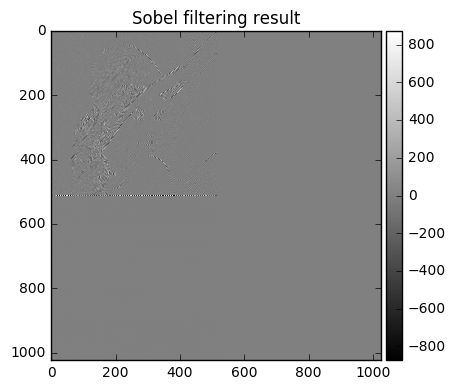

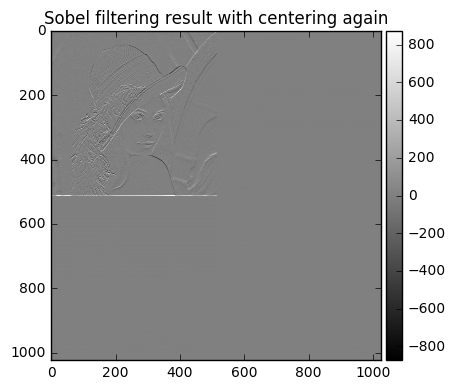

In [33]:
#applying sobel filter

img_res_freq = img_freq_center_lena * img_freq_center_filter

img_res_freq_inv = np.fft.ifft2(img_res_freq)
img_res_freq_real = img_res_freq_inv.real
print ('If we do an extra centering the results are better')
img_res_freq_real_centered = center(img_res_freq_real)

plt.figure()
plt.title('Sobel filtering result')
io.imshow(img_res_freq_real,cmap=plt.cm.gray)

plt.figure()
plt.title('Sobel filtering result with centering again')
io.imshow(img_res_freq_real_centered, cmap=plt.cm.gray)


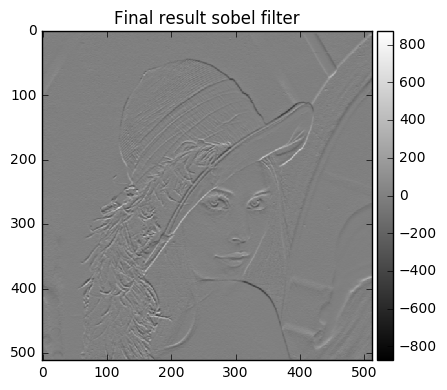

In [34]:
#cropping last image to display it entirely
crop_array = img_res_freq_real_centered[:512,:512]
plt.figure()
plt.title('Final result sobel filter')
io.imshow(crop_array, cmap=plt.cm.gray)